In [1]:
# Библиотеки использованные для обработки данных
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) 

In [2]:
# Датафрейм читается из csv файла - stroke_data.csv - взятого с kaggle
df = pd.read_csv('stroke_data.csv', index_col=0)

In [3]:
# Первые 5 строк датафрейма
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Поиск NULL значений в каждом из столбцов

In [4]:
# Вывод NULL значений в каждом из столбцов
print(df.isna().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


- Подсчет кол-ва NULL, вышло порядка 201 значения на весь датасет и все в столбце bmi.

In [5]:
# Для преодоления значений NULL, было решено заполнить пропуски средним значением.
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [6]:
# Предоставление типов данных всех столбцов и количество значений NOT NULL
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [7]:
# Дубликатов не было обнаружено
df.duplicated().sum()

0

# EDA/Разведовочный анализ

## Анализ атрибута gender(пол)

In [8]:
# Просмотр значений столбца gender
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

- Мы имеем значение 'other' в gender и поскольку есть только 1 случай мы его заменим на 'female'

<Axes: ylabel='gender'>

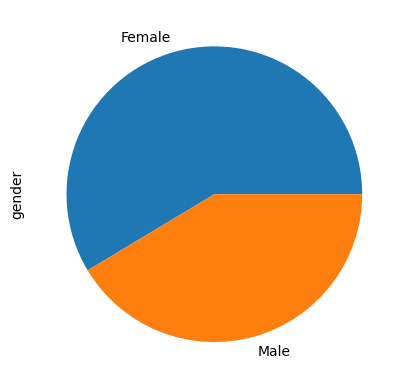

In [9]:
# Замена 'other' в gender на 'Female' 
df['gender'] = df['gender'].replace('Other', 'Female')
# Построение круговой диаграммы, чтобы увидеть распределение пола 
df['gender'].value_counts().plot(kind='pie')

- Заметное преобладание женщин, нежели мужчин

## Анализирование атрибута stroke(инсульт)

In [10]:
# Подсчет количества значений в атрибуте stroke
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<Axes: >

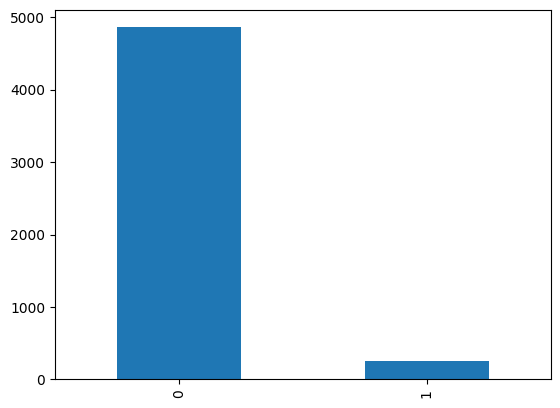

In [11]:
# Графическое представление распределения количества значений атрибута stroke
df['stroke'].value_counts().plot(kind='bar')

- Порядка 5% людей с которыми случился инсульт

## Анализирование атрибута hypertension(гипертония)

In [12]:
# Подсчет количества значений в атрибуте hypertension
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

<Axes: >

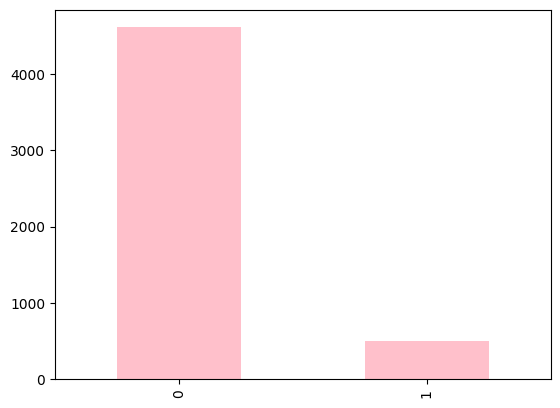

In [13]:
# Графическое представление распределения количества значений атрибута hypertension
df['hypertension'].value_counts().plot(kind='bar', color = 'pink')

- Порядка 10% людей с гипертонией

## Анализирование атрибута Work type(тип работы)

In [14]:
# Подсчет количества значений в атрибуте work_type
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<Axes: ylabel='work_type'>

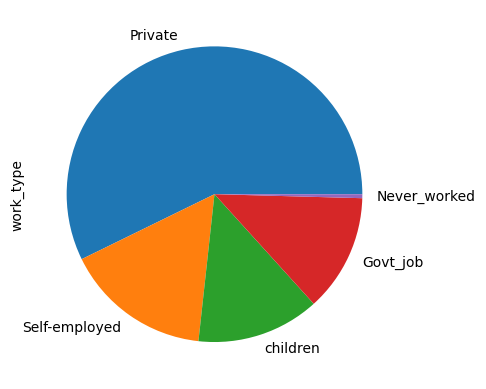

In [15]:
# Круговая диаграмма распределения количества значений атрибута work_type
df['work_type'].value_counts().plot(kind='pie')

## Анализирование атрибута Smoking status(статус курения)

In [16]:
# Подсчет количества значений в атрибуте smoking_status
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<Axes: ylabel='smoking_status'>

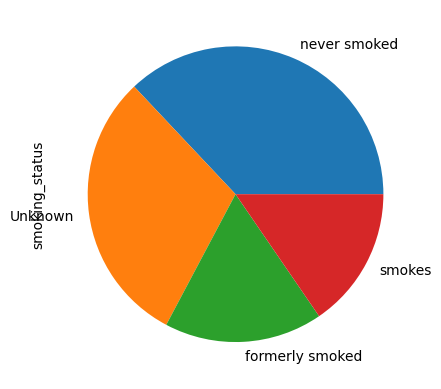

In [17]:
# Круговая диаграмма распределения количества значений атрибута smoking_status
df['smoking_status'].value_counts().plot(kind='pie')

## Анализирование атрибута Residense type(вид проживания)

In [18]:
# Подсчет количества значений в атрибуте Residence_type
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

<Axes: ylabel='Residence_type'>

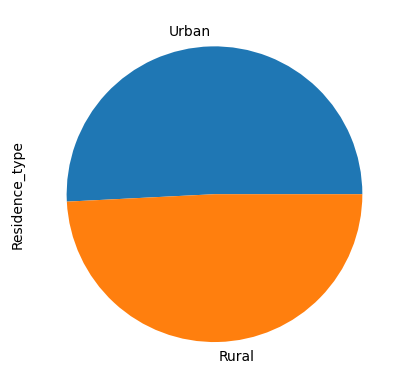

In [19]:
# Круговая диаграмма распределения количества значений атрибута Residence_type
df['Residence_type'].value_counts().plot(kind='pie')

- Мы имеем почти равный процент людей с городских и сельских районов 

## Анализирование атрибута bmi(индекс массы тела)

<Axes: xlabel='bmi', ylabel='Count'>

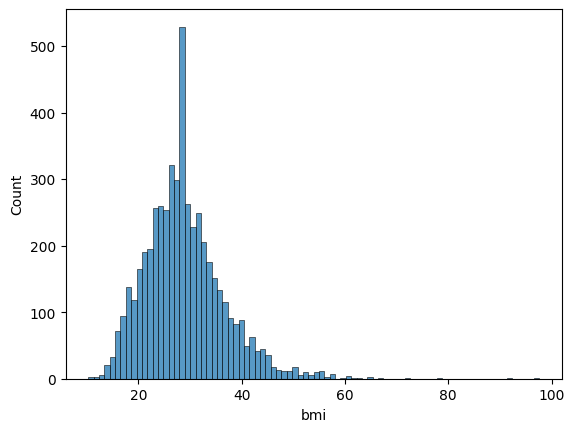

In [20]:
# Графическое представление атрибута bmi
sns.histplot(data=df['bmi'])

<Axes: ylabel='bmi'>

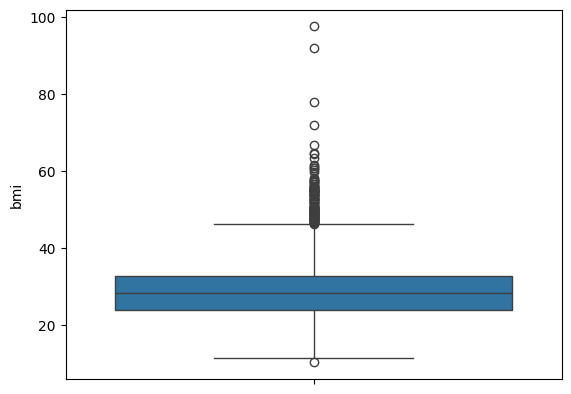

In [21]:
# Коробчатая диаграмма для атрибута bmi
sns.boxplot(data=df['bmi'])

- Основываясь на гистограмме и коробчатой диаграмме видно большое количество выбросов

In [22]:
# Нахождение количества выбросов основываясь на межквартильном размахе(IQR)
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 -Q1
da = (df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

False    4984
True      126
Name: bmi, dtype: int64

- Общее количество выбросов в bmi: 110
- Общее количество не выбросов в bmi: 5000

## Анализирование атрибута age(возраст)

<Axes: xlabel='age', ylabel='Count'>

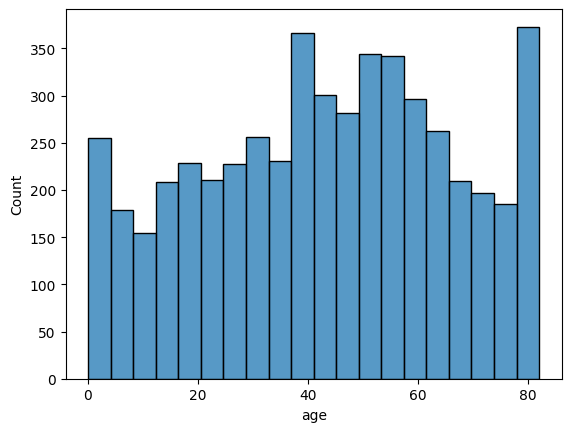

In [23]:
# Графическое представление данных атрибута age
sns.histplot(data=df['age'])

<Axes: ylabel='age'>

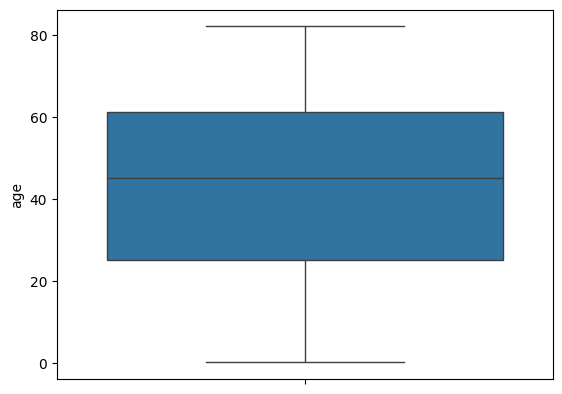

In [24]:
# Коробчатая диаграмма для атрибута age
sns.boxplot(data=df['age'])

- Атрибут age не имеет выбросов и имеет нормальное распределение

## Анализирование атрибута Average glucose level(средний уровень глюкозы)

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

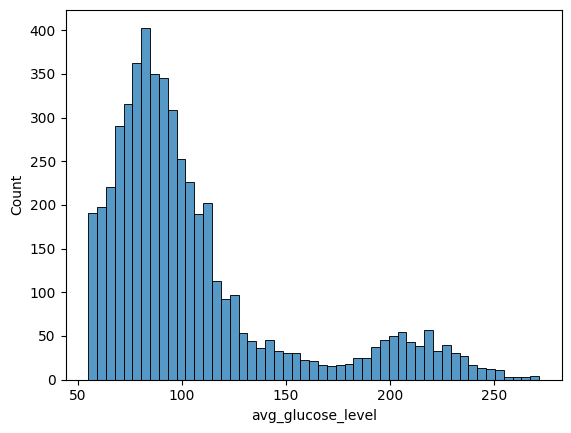

In [25]:
# Графическое представление данных атрибута avg_glucose_level
sns.histplot(data=df['avg_glucose_level'])

<Axes: ylabel='avg_glucose_level'>

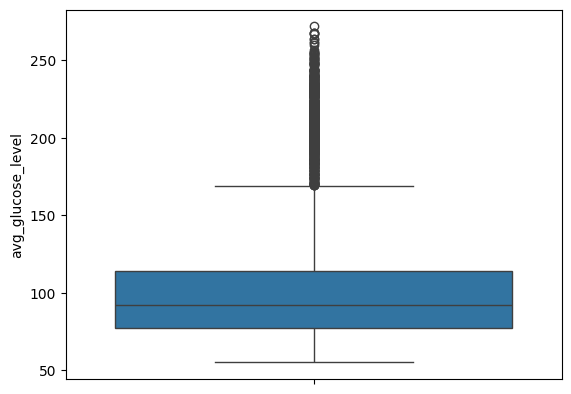

In [26]:
# Коробчатая диаграмма для атрибута avg_glucose_level
sns.boxplot(data=df['avg_glucose_level'])

- Присутствует большое количество выбросов как на гистограмме, так и на коробчатой диаграмме

In [27]:
# Нахождение количества выбросов основываясь на межквартильном размахе(IQR)
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 -Q1
da = (df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] >(Q3 + 1.5 * IQR))
da.value_counts()

False    4483
True      627
Name: avg_glucose_level, dtype: int64

- Общее количество выбросов в avg_glucose_level: 110
- Общее количество не выбросов в avg_glucose_level: 5000

/var/folders/np/7w4_pgnx3q99j4gqz4v_sxww0000gn/T/ipykernel_22495/3362896057.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

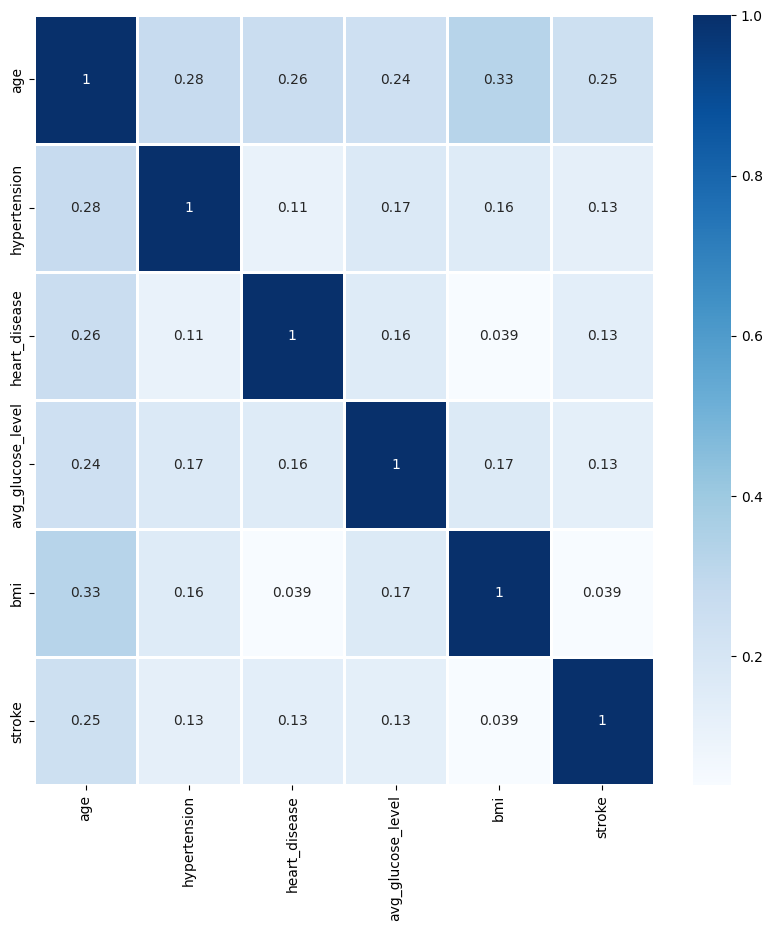

In [28]:
# Построение корреляционной матрицы между атрибутами в датасете, чтобы узнать коррелляцию между ними
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, ax=ax, cmap="Blues", linewidths=0.8, annot=True)

- Мы имеем слабую корреляцию между атрибутами, смотря на тепловую карту
- Самую высокую корреляцию имеет age и bmi - 0.33
- Остальные ниже этого показателя
- Из полученной тепловой карты невозможно получить какую-либо дельную информацию

## Анализирование атрибута Heart disease(сердечная болезнь)

In [29]:
# Подсчет количества значений атрибута heart_disease
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

- Порядка 6% людей имеют сердечные заболевания

<Axes: ylabel='heart_disease'>

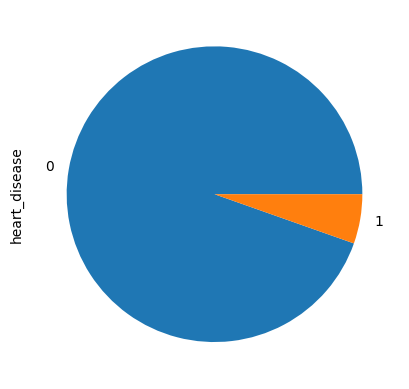

In [30]:
# Круговая диаграмма распределения количества значений атрибута heart_disease
df['heart_disease'].value_counts().plot(kind='pie')

## Анализирование атрибута Ever married(Когда-либо замужем/женат)

In [31]:
# Подсчет количества значений атрибута ever_married
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

- Результат сообщает нам о том, что более 60% людей женаты, остальные нет

<Axes: ylabel='ever_married'>

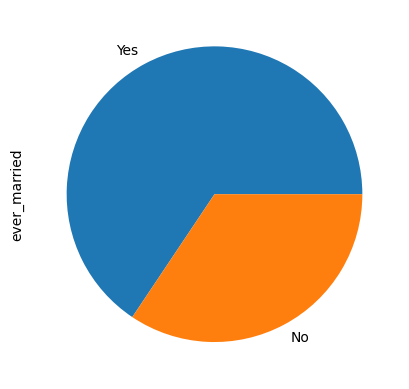

In [32]:
# Круговая диаграмма распределения количества значений атрибута ever_married
df['ever_married'].value_counts().plot(kind='pie')

# Перекрестный анализ всех атрибутов с целевым атрибутом

<Axes: xlabel='stroke', ylabel='count'>

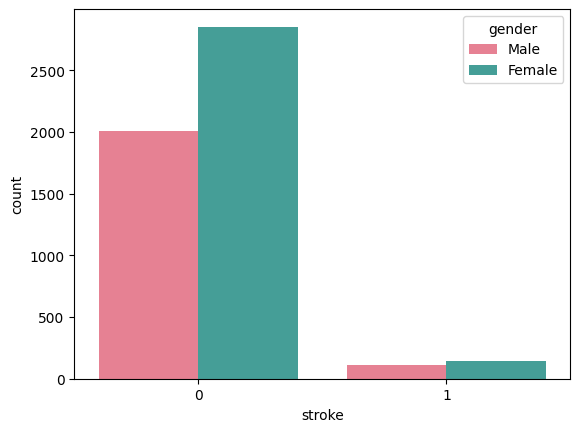

In [33]:
# Сравнение stroke с gender
sns.countplot(data=df, x='stroke', hue='gender', palette='husl')

- Женщины больше подвержены инсульту, чем мужчины

<Axes: xlabel='stroke', ylabel='count'>

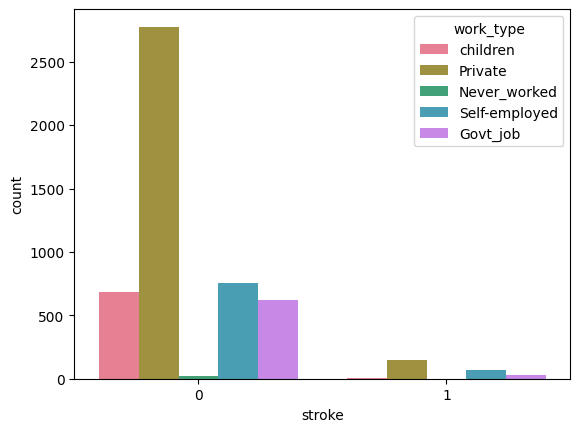

In [34]:
# Сравнение stroke с work_type
sns.countplot(data=df, x='stroke', hue='work_type', palette='husl')

- На графике выше можно увидеть, что люди никогда неработавшие не получали инсульта, а чаще всего кто получал - люди с частным типом работы 

<Axes: xlabel='stroke', ylabel='count'>

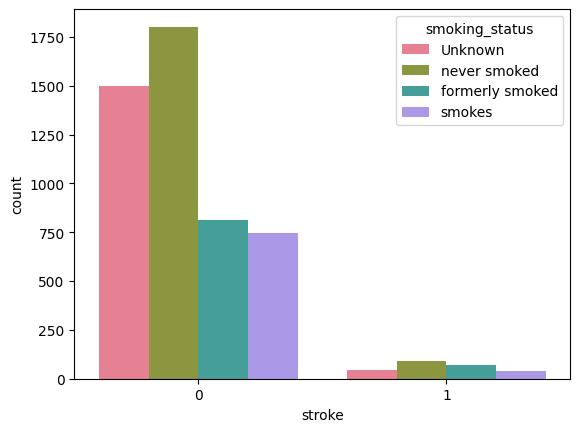

In [35]:
# Сравнение stroke с smoking_status
sns.countplot(data=df, x='stroke', hue='smoking_status', palette='husl')

- Люди, которые никогда не курили получили инсульт больше, чем те, которые бросили курить или курят до сих пор

<Axes: xlabel='stroke', ylabel='count'>

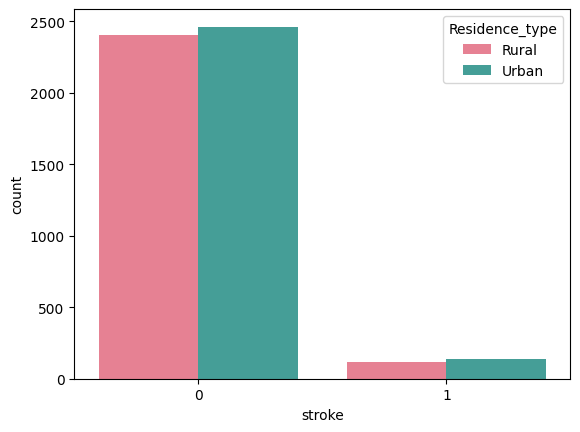

In [36]:
# Сравнение stroke с Residence_type
sns.countplot(data=df, x='stroke', hue='Residence_type', palette='husl')

- Основываясь на анализе типа проживания, люди которые живут в городе чаще получали инсульт

<Axes: xlabel='stroke', ylabel='count'>

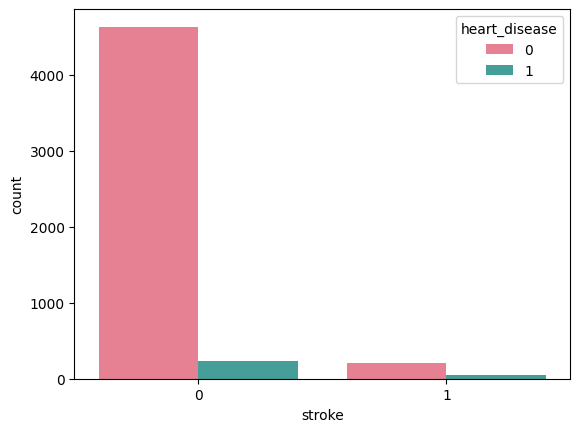

In [37]:
# Сравнение stroke с heart_disease
sns.countplot(data=df, x='stroke', hue='heart_disease', palette='husl')

- Большинство людей без сердечных заболеваний чаще страдают от инсульта по сравнению с теми, у кого были сердечные заболевания

<Axes: xlabel='stroke', ylabel='count'>

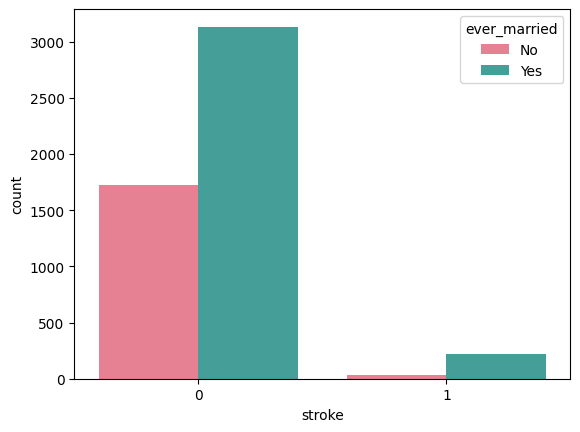

In [38]:
# Сравнение stroke с ever_married
sns.countplot(data=df, x='stroke', hue='ever_married', palette='husl')

- Большое количество людей в браке получают инсульт по сравнениюс теми, кто не в браке

In [ ]:
# Сохранение датафрейма в датасет с названием - Data_preprocessing.csv
df.to_csv('Data_preprocessing.csv')